In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input

In [11]:
train_data="/Users/madhurabhagat/Downloads/pest/train"
test_data="/Users/madhurabhagat/Downloads/pest/test"

(225, 225, 3)


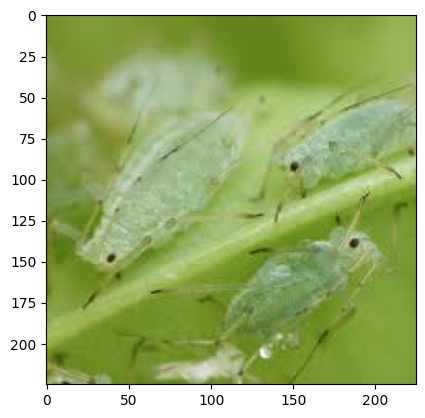

In [12]:
img_path="/Users/madhurabhagat/Downloads/pest/train/aphids/jpg_0 - Copy.jpg"
img=mpimg.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.show()

In [13]:
img_size=224
batch_size=32

In [14]:
data_gen=ImageDataGenerator(
    validation_split=0.2,
    rescale=1.0/255
)

In [15]:
train_generator=data_gen.flow_from_directory(
    train_data,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

Found 1788 images belonging to 9 classes.


In [16]:
val_generator=data_gen.flow_from_directory(
    train_data,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 444 images belonging to 9 classes.


In [17]:
test_generator = data_gen.flow_from_directory(
    test_data,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 384 images belonging to 9 classes.


In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(train_generator.num_classes, activation='softmax')  
])
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.1501 - loss: 2.3616 - val_accuracy: 0.2928 - val_loss: 1.9158
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.4450 - loss: 1.5889 - val_accuracy: 0.4414 - val_loss: 2.0193
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7771 - loss: 0.6262 - val_accuracy: 0.4234 - val_loss: 2.2385
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9196 - loss: 0.2496 - val_accuracy: 0.4347 - val_loss: 2.5248
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9590 - loss: 0.1517 - val_accuracy: 0.3919 - val_loss: 3.5467
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9761 - loss: 0.1119 - val_accuracy: 0.3671 - val_loss: 3.7064
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9776 - loss: 0.0744 - val_accuracy: 0.3761 - val_loss: 3.5932
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9654 - loss: 0.0951 - val_accuracy: 0.3536 - val_loss: 3.8033
Epo

In [24]:
loss, accuracy = model.evaluate(test_generator)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 315ms/step - accuracy: 0.8255 - loss: 0.9094
Train Loss: 1.0758579969406128
Train Accuracy: 0.8229166865348816
